William Alan Cahyadi

2602110752

a. Loading dan Scaling Data



In [1]:
import os
import gzip
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

x_train shape: (54000, 28, 28, 1)
x_val shape: (6000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


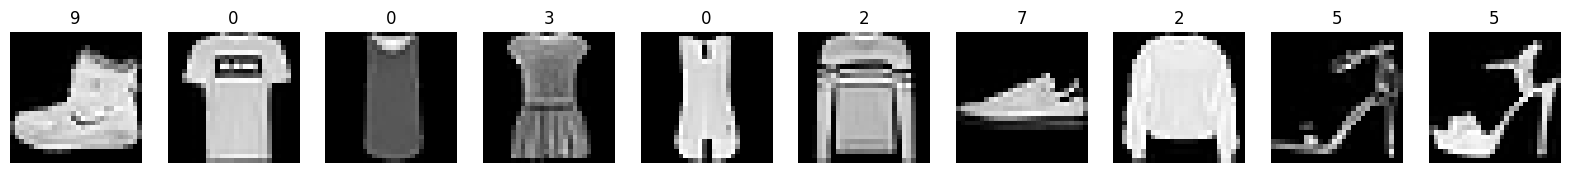

In [3]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28)

    return images, labels

path = ''
train_images, train_labels = load_mnist(path, kind='train')
test_images, test_labels = load_mnist(path, kind='t10k')

x_train = train_images.astype('float32') / 255.
x_test = test_images.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

x_train, x_val = train_test_split(x_train, test_size=0.1, random_state=42)

print(f'x_train shape: {x_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'x_test shape: {x_test.shape}')

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)
x_train_scaled, x_val_scaled = train_test_split(x_train_scaled, test_size=0.1, random_state=42)

b. Baseline Autoencoder Architecture

Epoch 1/20
380/380 [==============================] - 144s 374ms/step - loss: 0.3157 - val_loss: 0.2860
Epoch 2/20
380/380 [==============================] - 135s 356ms/step - loss: 0.2801 - val_loss: 0.2773
Epoch 3/20
380/380 [==============================] - 138s 363ms/step - loss: 0.2740 - val_loss: 0.2728
Epoch 4/20
380/380 [==============================] - 139s 366ms/step - loss: 0.2709 - val_loss: 0.2706
Epoch 5/20
380/380 [==============================] - 135s 355ms/step - loss: 0.2688 - val_loss: 0.2687
Epoch 6/20
380/380 [==============================] - 139s 365ms/step - loss: 0.2672 - val_loss: 0.2672
Epoch 7/20
380/380 [==============================] - 138s 362ms/step - loss: 0.2661 - val_loss: 0.2665
Epoch 8/20
380/380 [==============================] - 136s 358ms/step - loss: 0.2651 - val_loss: 0.2654
Epoch 9/20
380/380 [==============================] - 138s 364ms/step - loss: 0.2643 - val_loss: 0.2648
Epoch 10/20
380/380 [==============================] - 135s 355m

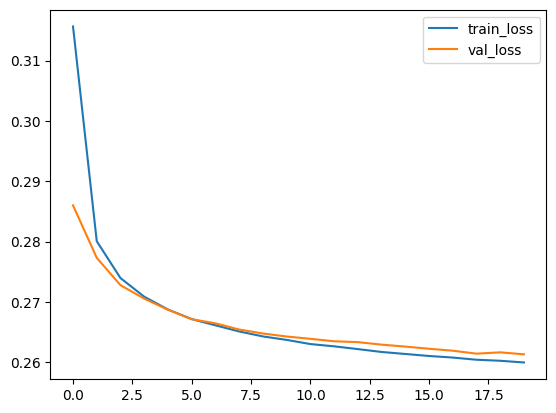

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape

input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
encoder_output = Dense(128, activation='relu')(x)

x = Dense(6272, activation='relu')(encoder_output)
x = Reshape((7, 7, 128))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train_scaled, x_train_scaled, epochs=20, batch_size=128, validation_data=(x_val, x_val))

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

c. Modify the autoencoder architecture

Epoch 1/20
380/380 [==============================] - 233s 609ms/step - loss: 0.3080 - val_loss: 0.2831
Epoch 2/20
380/380 [==============================] - 234s 617ms/step - loss: 0.2769 - val_loss: 0.2743
Epoch 3/20
380/380 [==============================] - 234s 615ms/step - loss: 0.2711 - val_loss: 0.2701
Epoch 4/20
380/380 [==============================] - 235s 618ms/step - loss: 0.2678 - val_loss: 0.2671
Epoch 5/20
380/380 [==============================] - 249s 655ms/step - loss: 0.2657 - val_loss: 0.2657
Epoch 6/20
380/380 [==============================] - 236s 621ms/step - loss: 0.2640 - val_loss: 0.2642
Epoch 7/20
380/380 [==============================] - 238s 626ms/step - loss: 0.2628 - val_loss: 0.2636
Epoch 8/20
380/380 [==============================] - 234s 617ms/step - loss: 0.2618 - val_loss: 0.2630
Epoch 9/20
380/380 [==============================] - 234s 617ms/step - loss: 0.2609 - val_loss: 0.2615
Epoch 10/20
380/380 [==============================] - 233s 612m

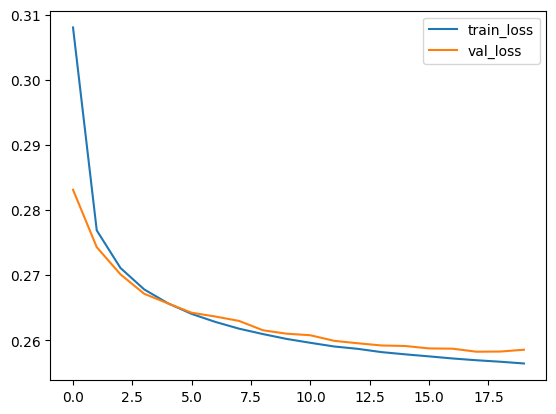

In [7]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
encoder_output = Dense(128, activation='relu')(x)

x = Dense(6272, activation='relu')(encoder_output)
x = Reshape((7, 7, 128))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

modified_autoencoder = Model(input_img, decoded)
modified_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
modified_history = modified_autoencoder.fit(x_train_scaled, x_train_scaled, epochs=20, batch_size=128, validation_data=(x_val, x_val))

plt.plot(modified_history.history['loss'], label='train_loss')
plt.plot(modified_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [8]:
def evaluate_ssim(model, x_test):
    decoded_imgs = model.predict(x_test)
    ssim_scores = []
    for i in range(len(x_test)):
        original = x_test[i].reshape(28, 28)
        reconstructed = decoded_imgs[i].reshape(28, 28)
        score, _ = ssim(original, reconstructed, full=True)
        ssim_scores.append(score)
    return np.mean(ssim_scores)

baseline_ssim = evaluate_ssim(autoencoder, x_test)
modified_ssim = evaluate_ssim(modified_autoencoder, x_test)

print(f'Baseline SSIM: {baseline_ssim}')
print(f'Modified SSIM: {modified_ssim}')

313/313 [==============================] - 12s 37ms/step
Baseline SSIM: 0.8637341328442916
Modified SSIM: 0.8852428357937723


Nilai SSIM yang lebih tinggi pada model yang sudah optimized menunjukkan bahwa model tersebut mampu mempertahankan lebih banyak detail dan struktur asli dari gambar input.

Modifikasi arsitektur dilakukan dengan menambah jumlah filter dari 32 menjadi 64, menggunakan layer MaxPooling dan UpSampling, serta menambah unit dense dari 128 menjadi 256.

Metode tuning hyperparameter, seperti penyesuaian learning rate, jumlah epoch, dan ukuran batch, juga dilakukan untuk mencegah overfitting atau underfitting. Pendekatan ini berhasil dan dibuktikan dengan peningkatan nilai SSIM pada model yang sudah dituning, sehingga menghasilkan performa yang lebih optimal.